In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from sklearn import cluster, datasets, preprocessing

plt.style.use("seaborn-colorblind")
%matplotlib inline

In [2]:
img = pathlib.Path("../../img/clusters/")
img.mkdir(exist_ok=True)

In [3]:
n_samples = 300
noise = 0.05
seed = 3

moons, _ = datasets.make_moons(n_samples=n_samples, noise=noise, random_state=seed)

ellipses, _ = datasets.make_blobs(n_samples=n_samples, random_state=170)
transformation = [[0.4, 0.8], [-0.6, 0.1]]
ellipses = np.dot(ellipses, transformation)

spheres, _ = datasets.make_blobs(n_samples=n_samples, random_state=seed)

In [4]:
def plot_scatter(data, method, lims=(-3, 3), filename=None, **kwargs):
    """Make the requisite scatter plot for a dataset and a particular method."""

    _, ax = plt.subplots(dpi=300)

    m = method(**kwargs)
    scaled = preprocessing.StandardScaler().fit_transform(data.copy())
    m = m.fit(scaled)

    labels = m.labels_
    outlier_mask = labels == -1
    inliers = scaled[~outlier_mask, :]
    outliers = scaled[outlier_mask, :]

    ax.scatter(
        inliers[:, 0],
        inliers[:, 1],
        s=30,
        c=labels[~outlier_mask],
        alpha=0.75,
        ec="None",
    )

    ax.scatter(
        outliers[:, 0], outliers[:, 1], marker="s", s=5, c="None", ec="k"
    )

    if isinstance(m, cluster.KMeans):
        n_clusters = m.n_clusters
        if n_clusters == 2:
            edges = ["darkgray", "darkgray"]
        else:
            edges = ["lightgray", "lightgray", "darkgray"]

        centres = m.cluster_centers_
        ax.scatter(
            centres[:, 0],
            centres[:, 1],
            marker="X",
            s=50,
            c=range(n_clusters),
            ec=edges,
        )

    ax.set(
        aspect="equal", xticks=[], yticks=[], xlim=lims, ylim=lims
    )

    plt.tight_layout()
    if filename is not None:
        plt.savefig(f"{filename}", transparent=True)

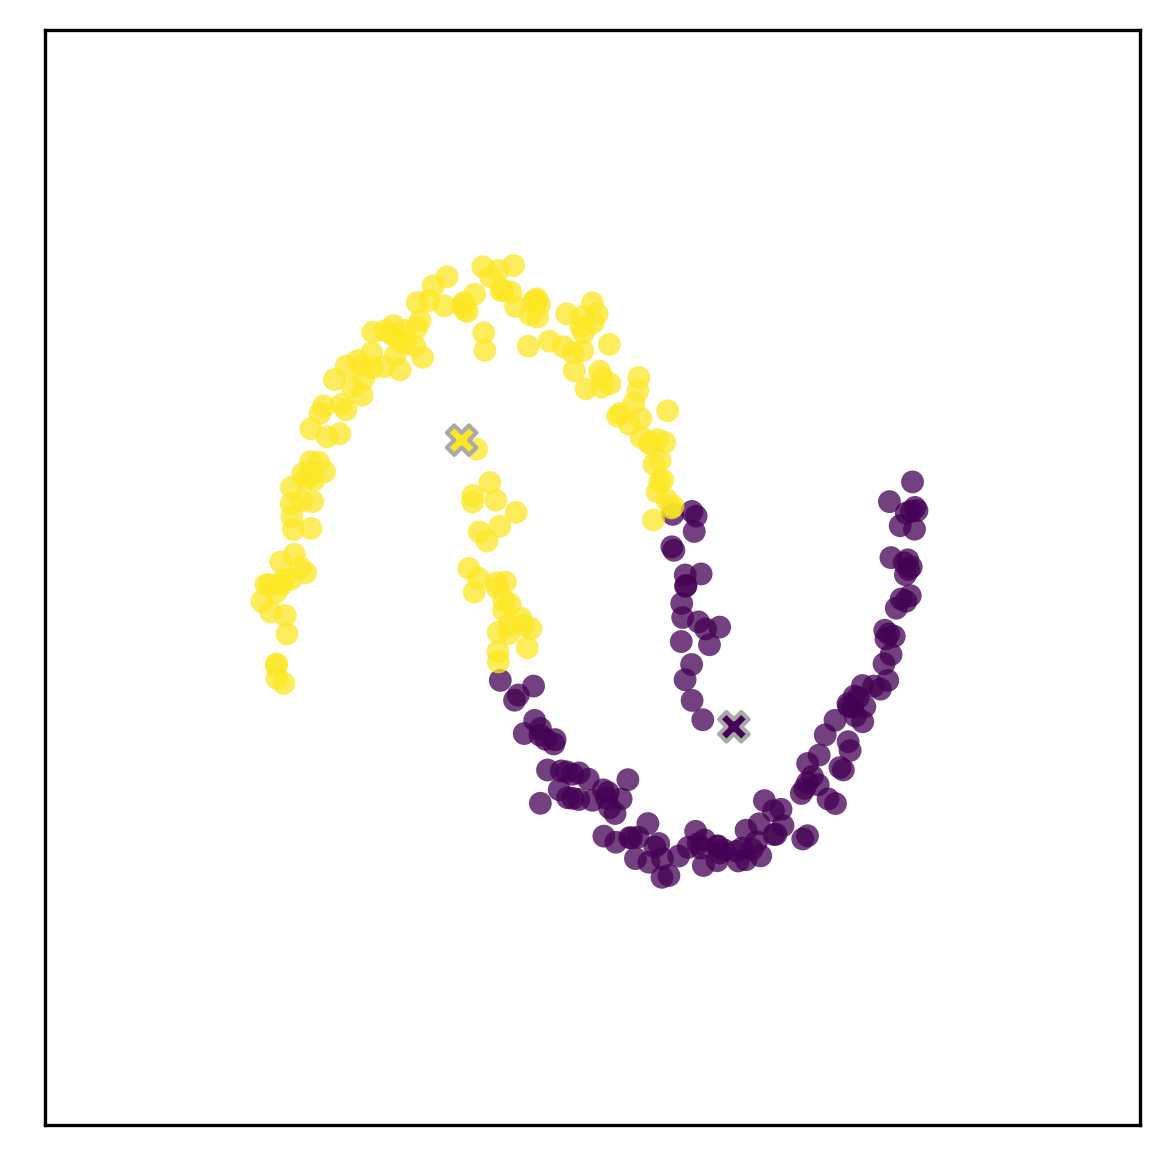

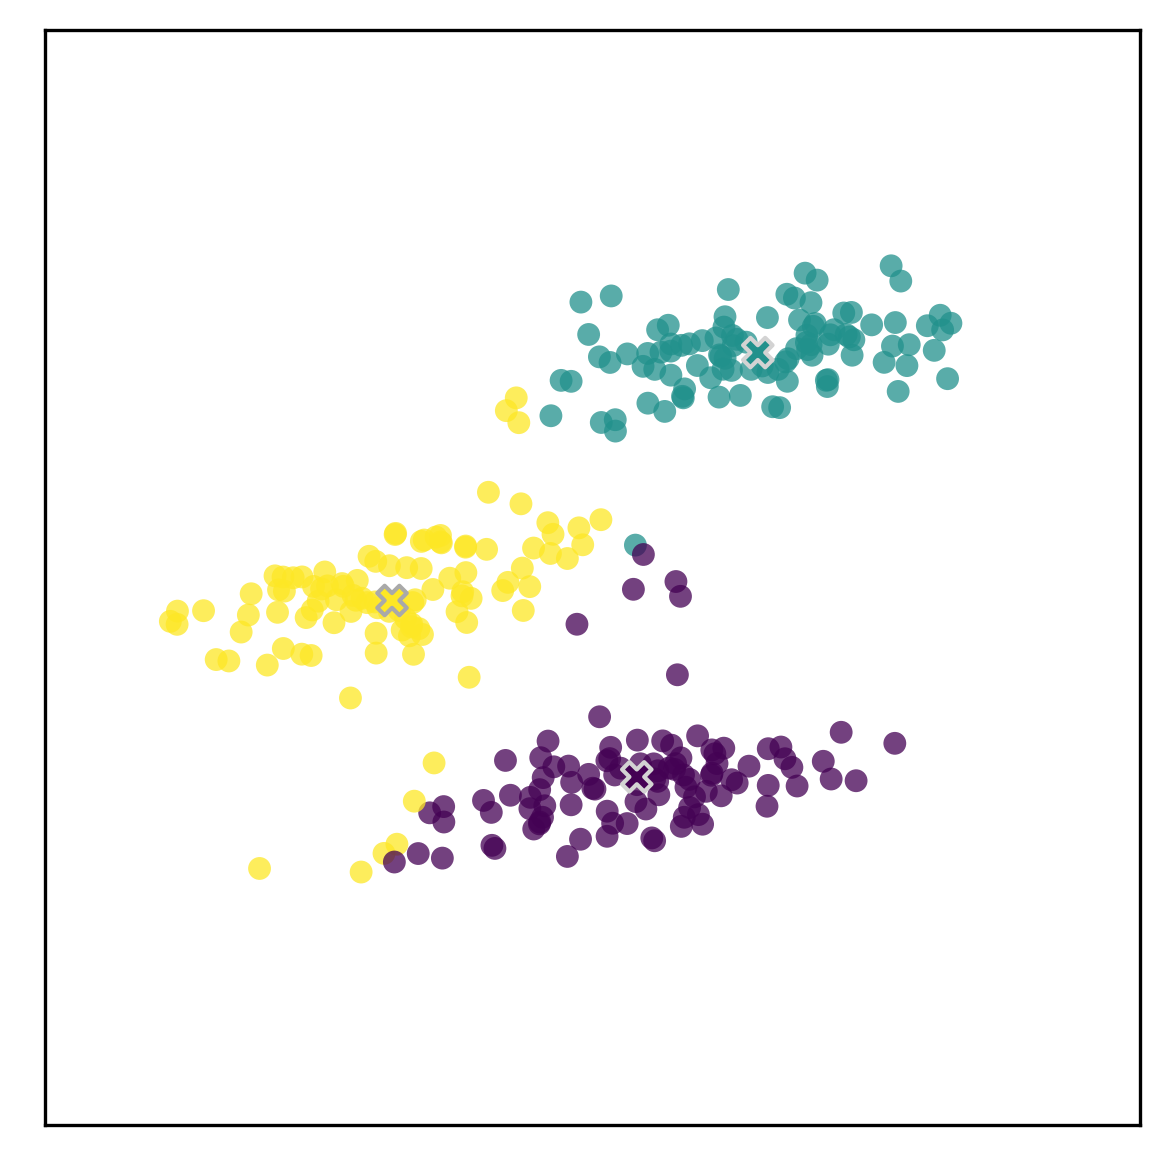

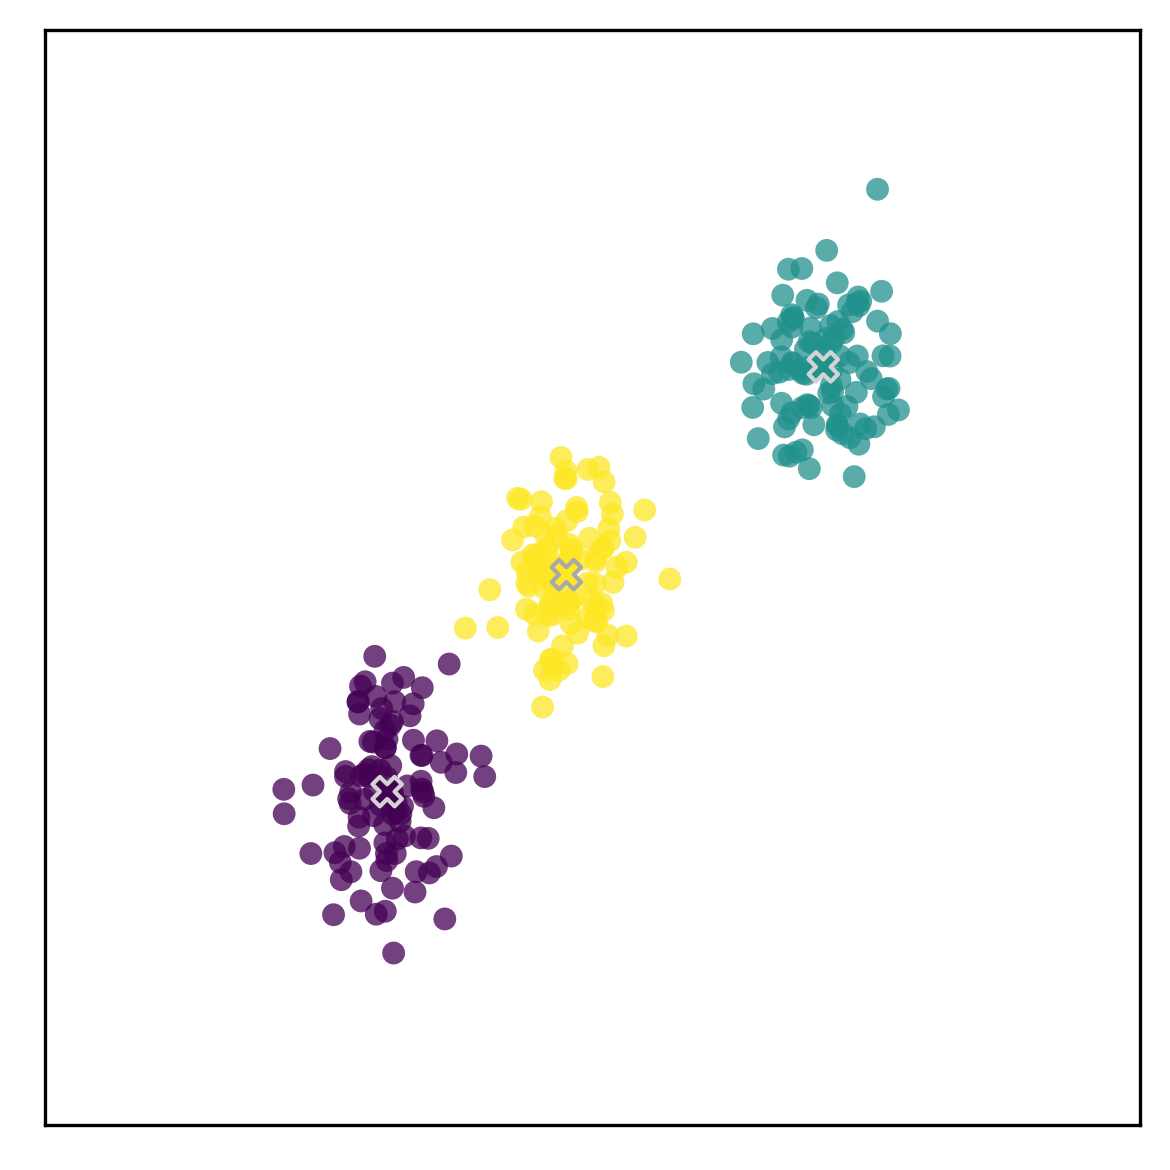

In [5]:
for n_clusters, data, name in zip((2, 3, 3), (moons, ellipses, spheres), ("moons", "ellipses", "spheres")):
    plot_scatter(data, cluster.KMeans, filename=img / f"kmeans_{name}.pdf", n_clusters=n_clusters)

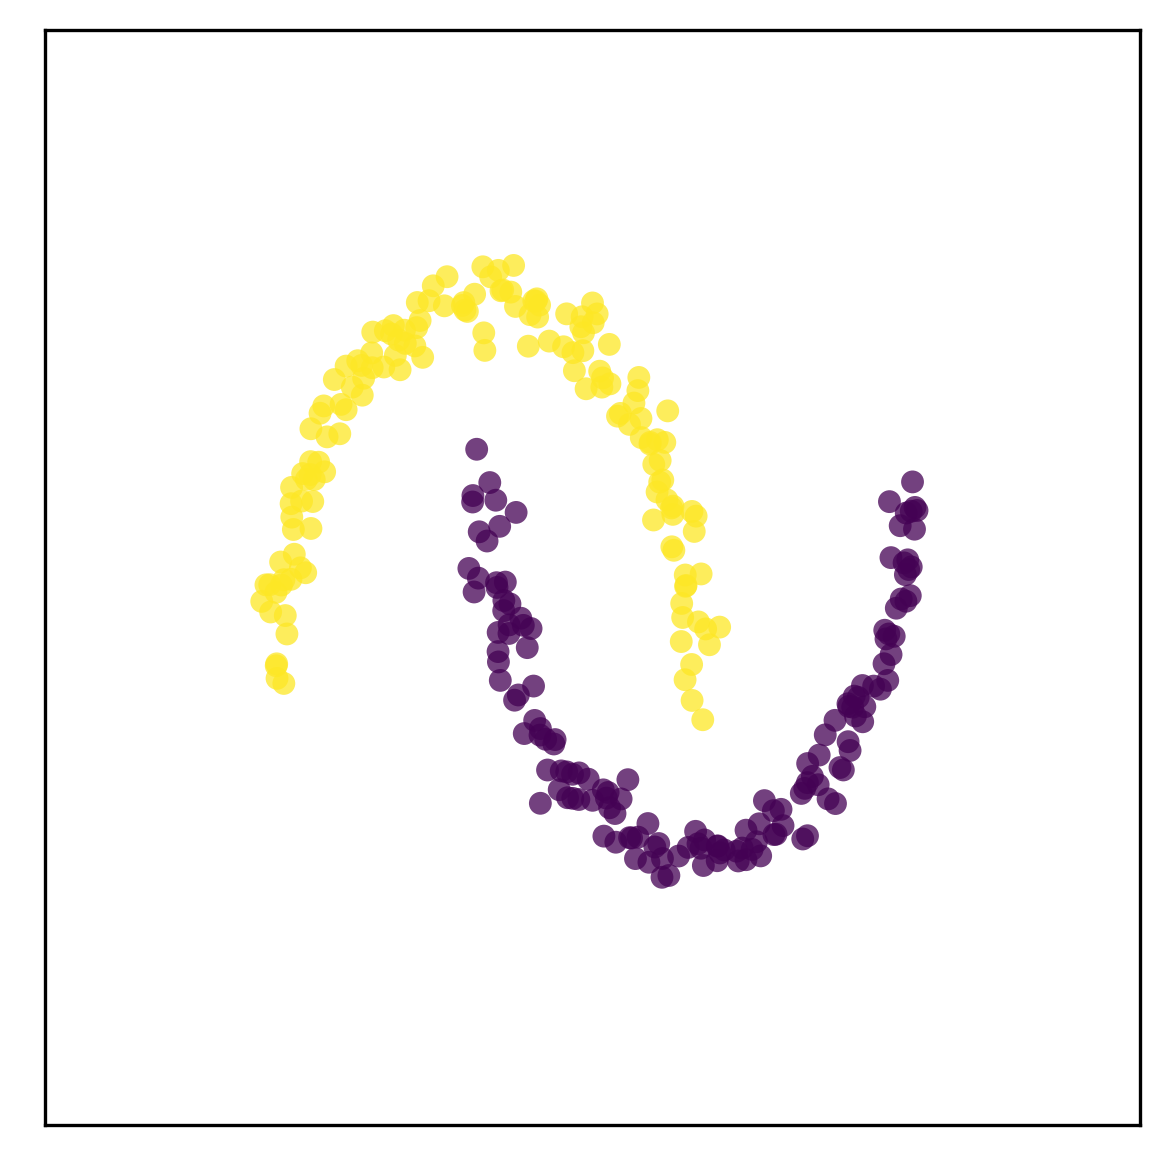

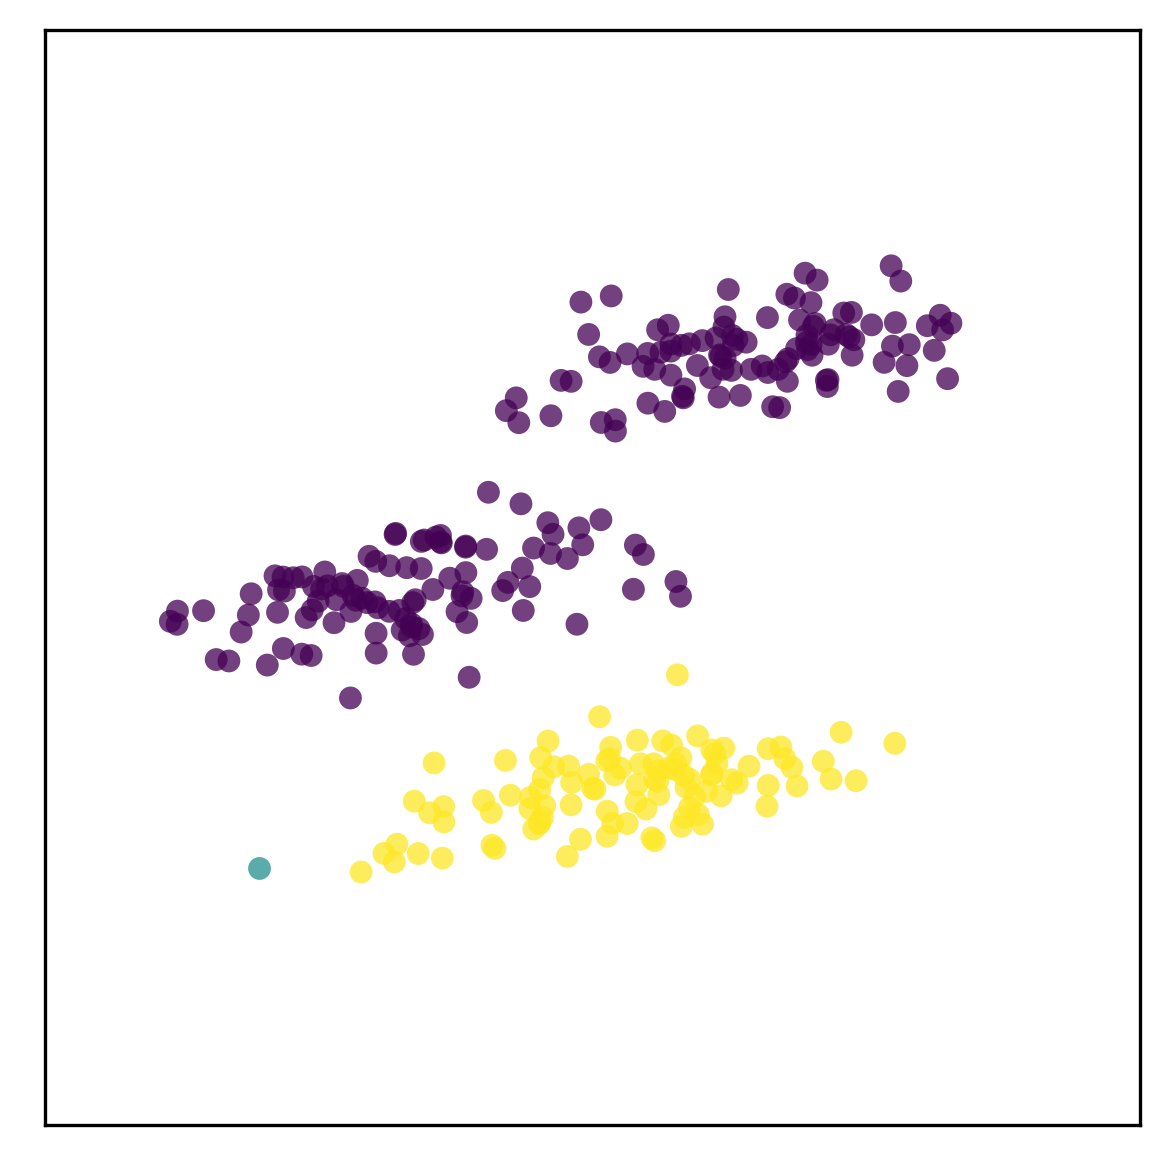

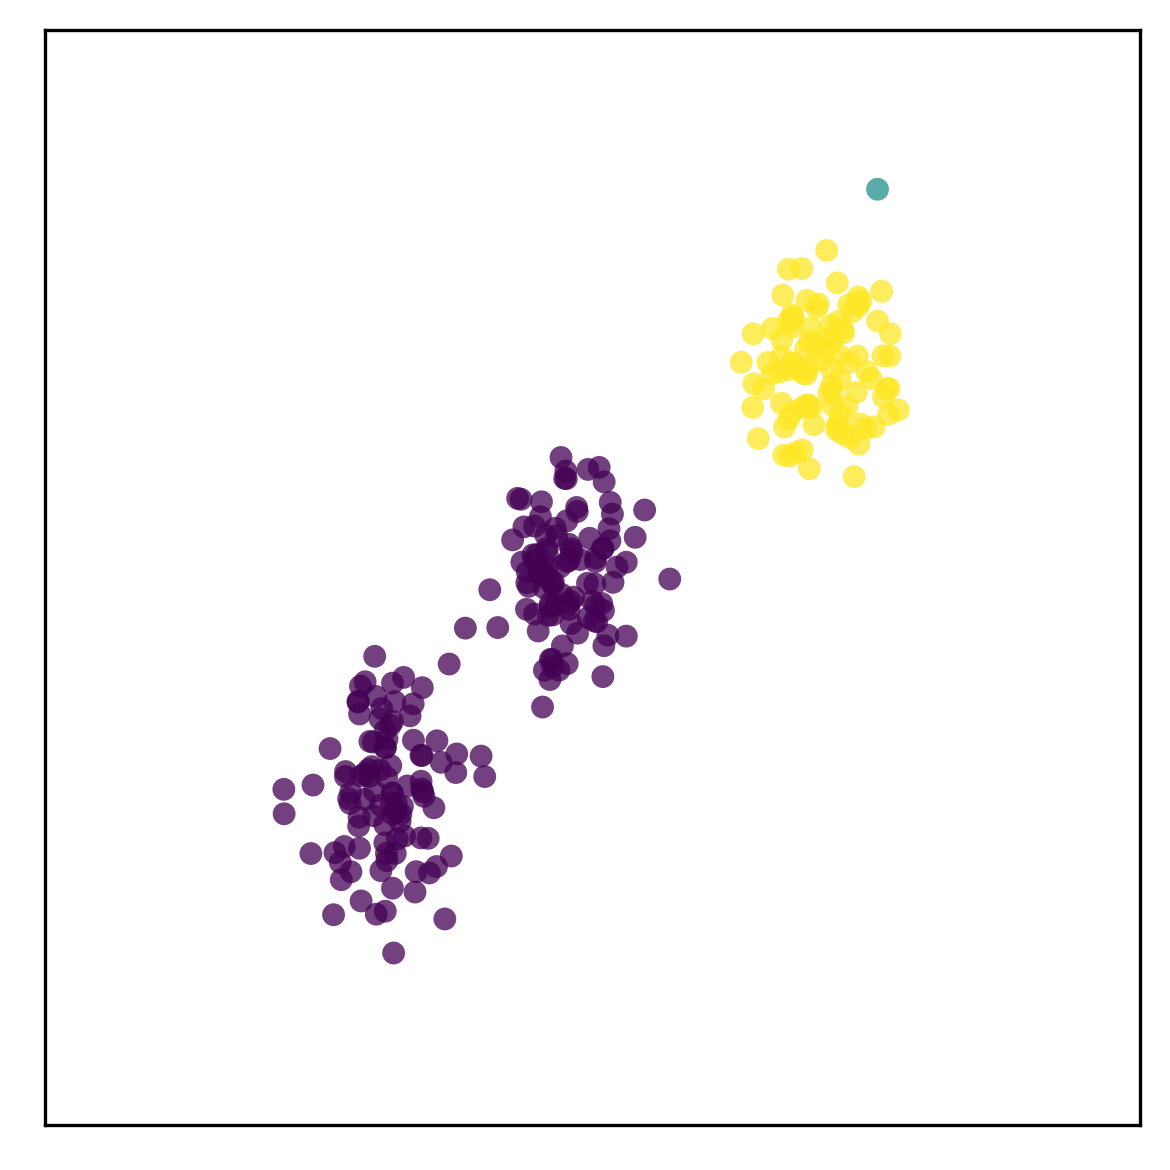

In [6]:
criterion = "single"
for n_clusters, data, name in zip((2, 3, 3), (moons, ellipses, spheres), ("moons", "ellipses", "spheres")):
    plot_scatter(data, cluster.AgglomerativeClustering, filename=img / f"slink_{name}.pdf", linkage=criterion, n_clusters=n_clusters)

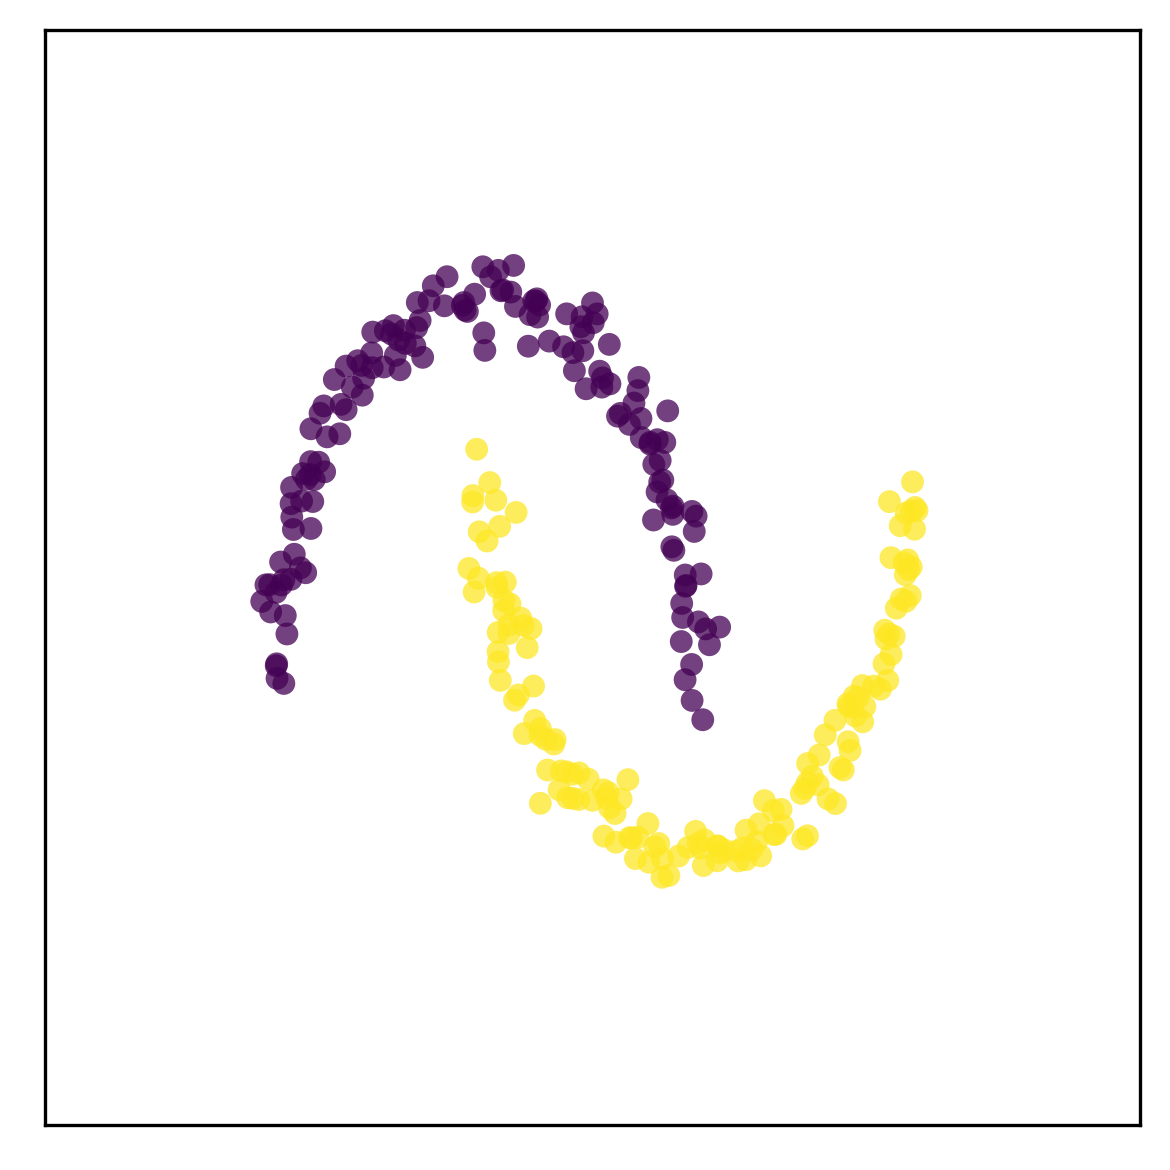

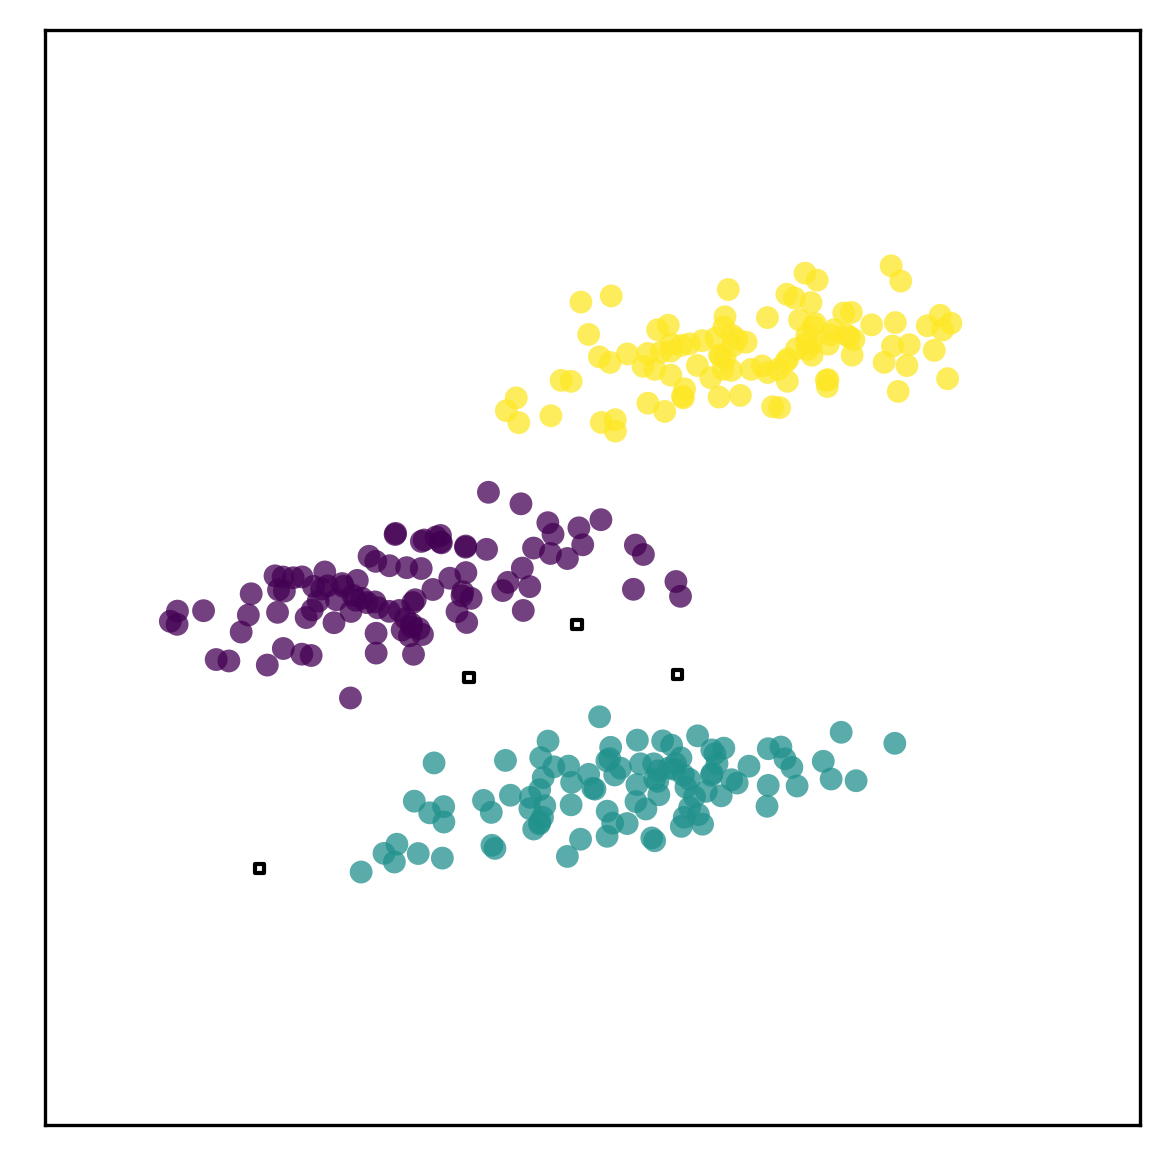

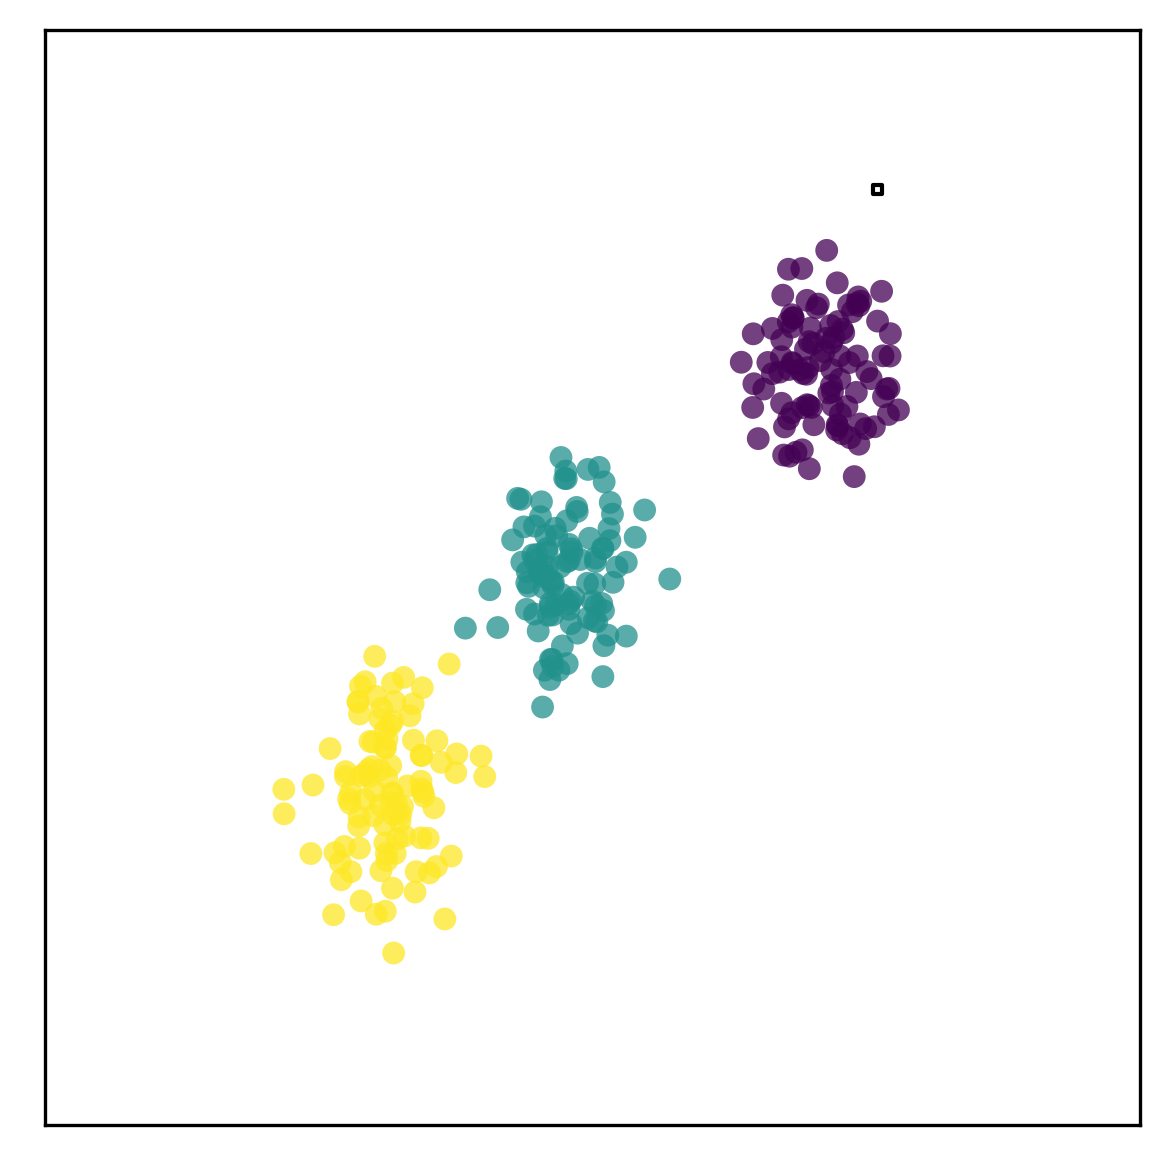

In [7]:
for data, name in zip((moons, ellipses, spheres), ("moons", "ellipses", "spheres")):
    plot_scatter(data, cluster.DBSCAN, filename=img / f"dbscan_{name}.pdf", eps=0.3)

In [8]:
def plot_dendrogram(data, criterion="single", filename=None, **kwargs):
    """Create linkage matrix and then plot the dendrogram."""

    _, ax = plt.subplots(dpi=300)
    
    linkage_matrix = hierarchy.linkage(data, criterion)
    hierarchy.dendrogram(linkage_matrix, ax=ax, **kwargs)

    ax.set(
        xlabel="Index of point (or size of cluster)",
        ylabel="Linkage",
        aspect=1 / ax.get_data_ratio(),
    )

    plt.tight_layout()
    if filename is not None:
        plt.savefig(f"{filename}.pdf", transparent=True)

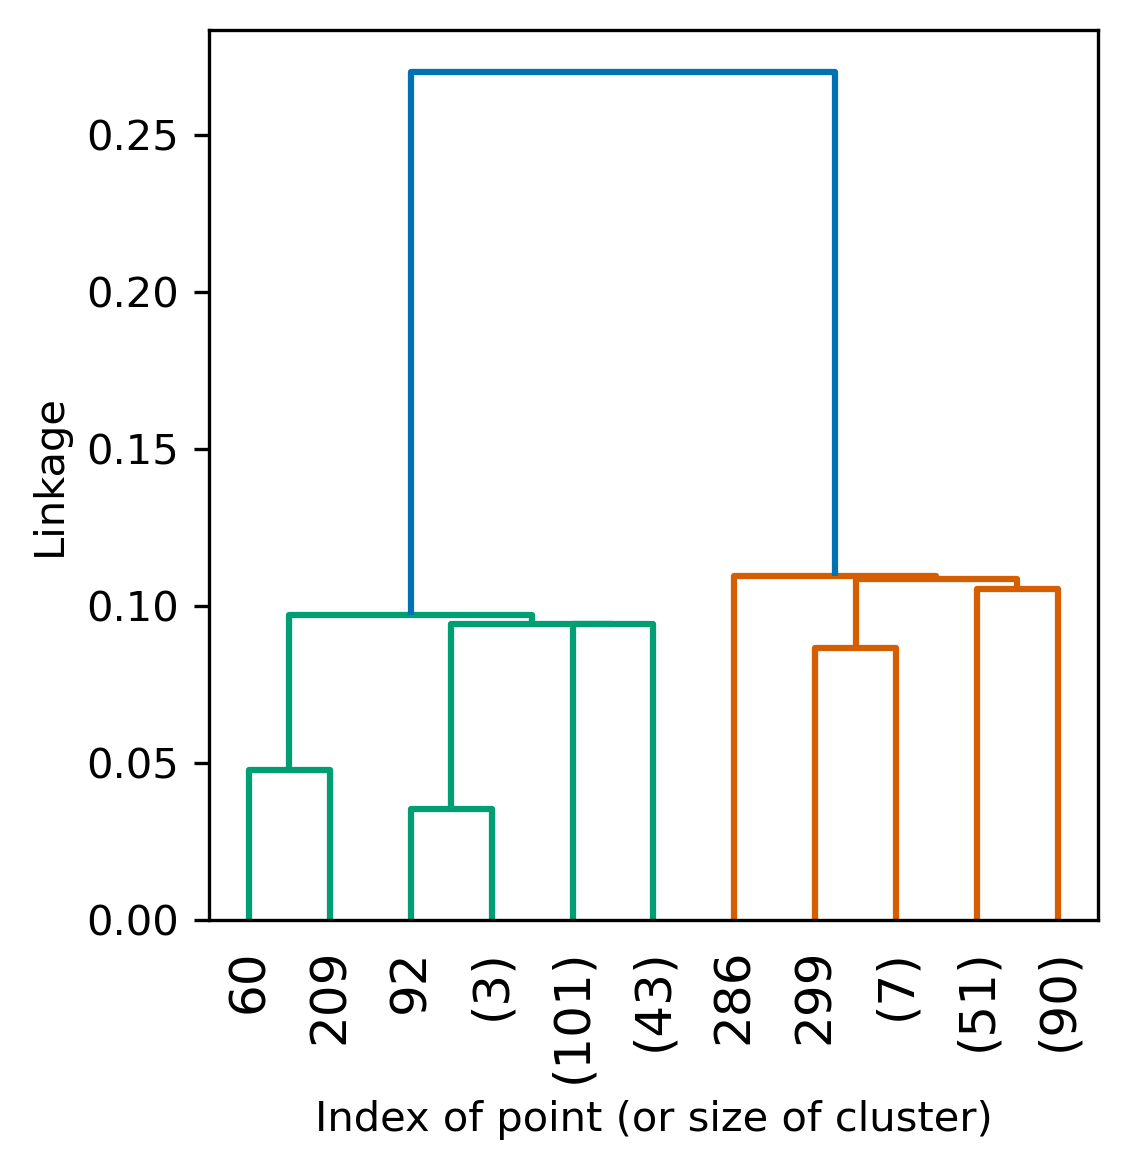

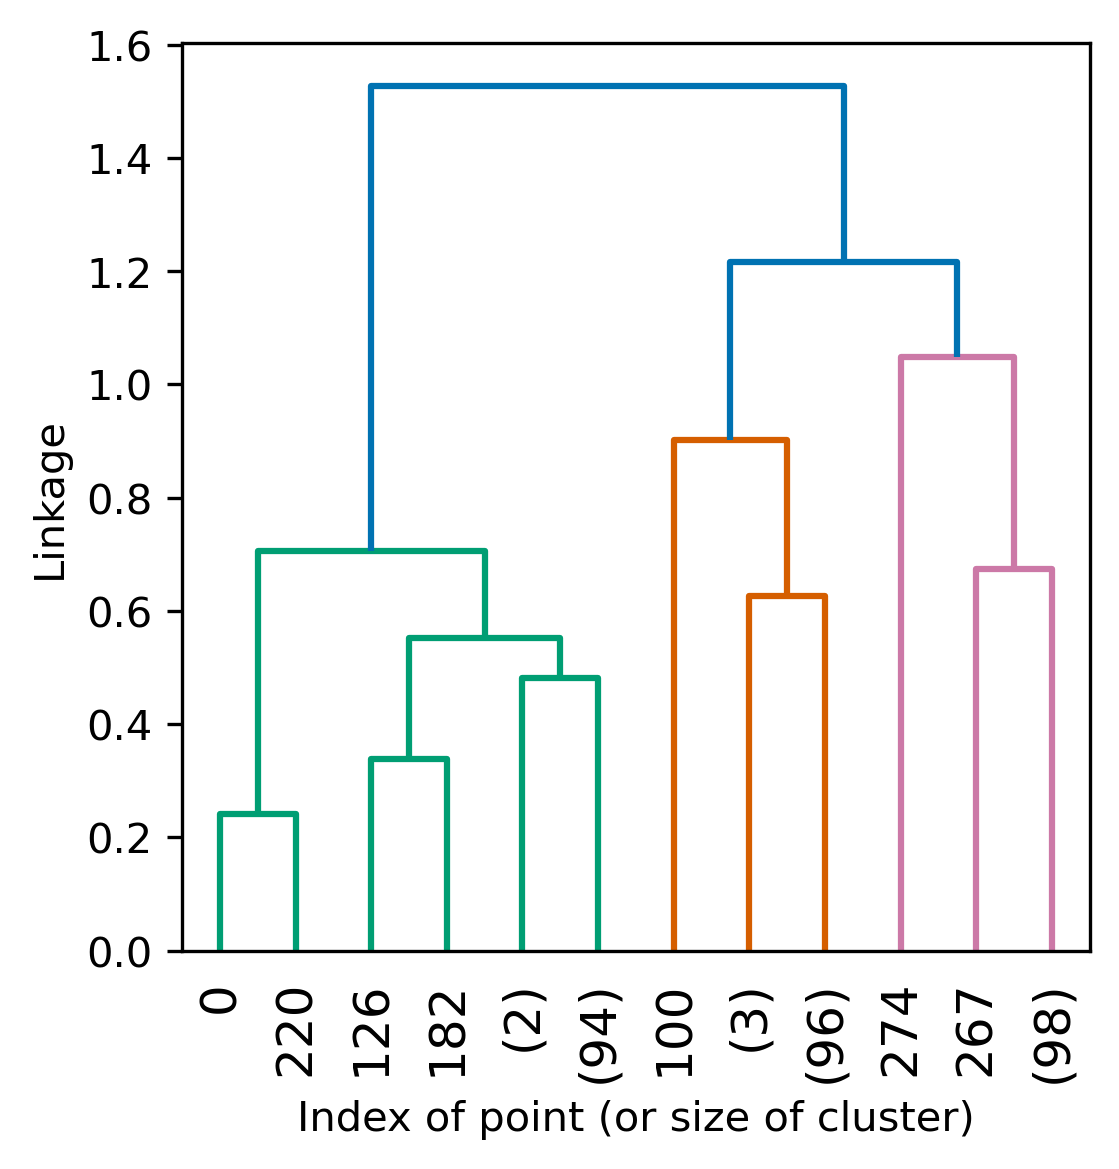

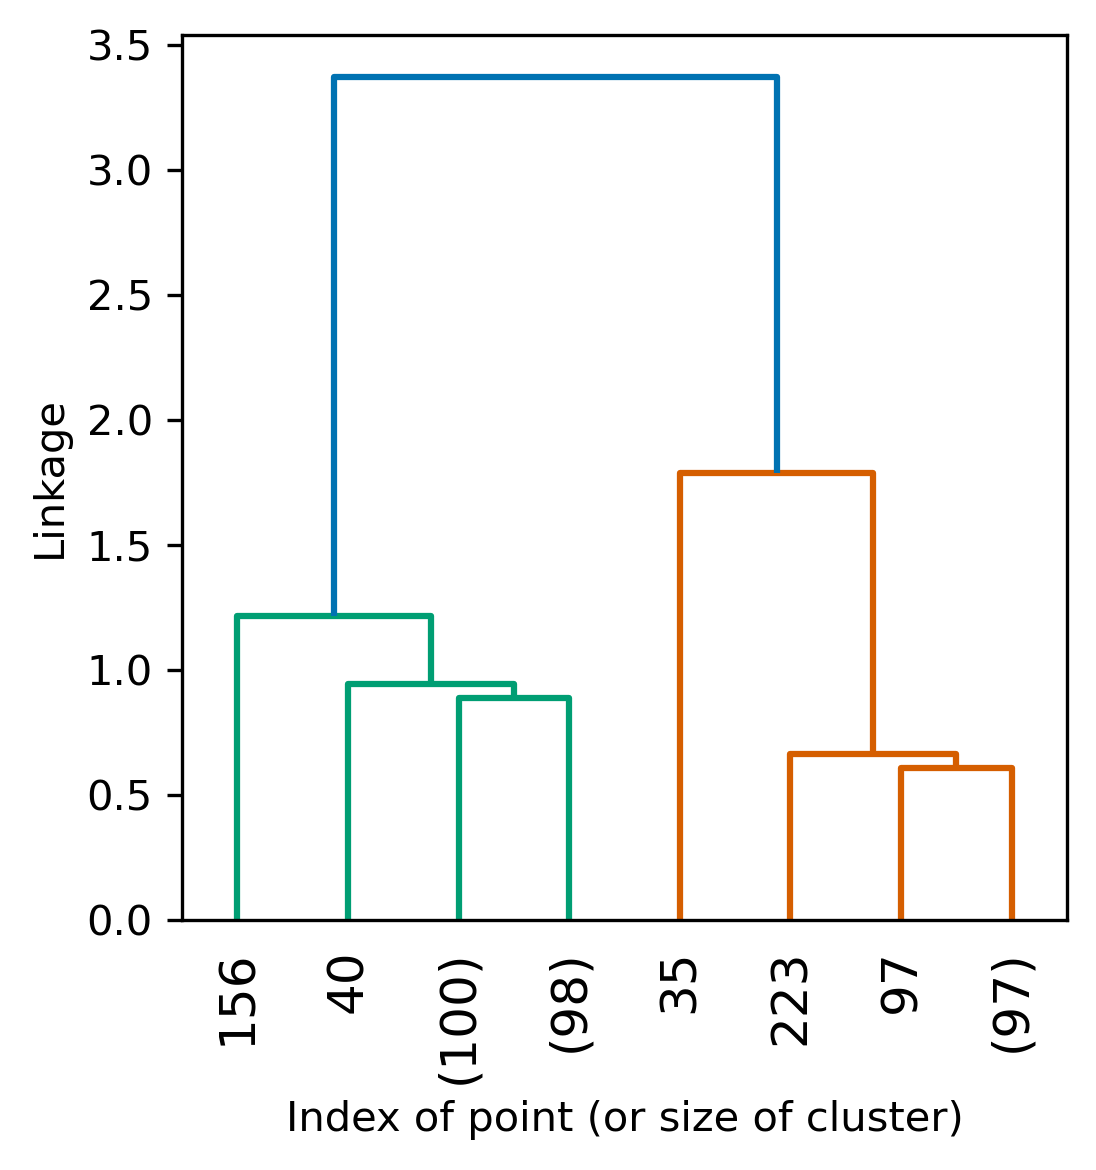

In [9]:
for data, name in zip((moons, ellipses, spheres), ("moons", "ellipses", "spheres")):
    plot_dendrogram(data, criterion, filename=img / f"dendogram_{name}.pdf", truncate_mode="level", p=3, leaf_rotation=90)